# Predicticting Titanic Disaster Survival using Machine Learning

This notebook looks into using varius Python-based Machine Learning and Data Science libraries in an attempt to build a Machine Learning model capable of predicting whether a person survived the Titanic Disaster based on their personal data.

We're goind to take the dollowing approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features (wich one contributes to the model)
5. Modeling
6. Experimentation

## 1. Problem definition

In a statment,

> Giving some personal data about a passanger, Can we predict whether a person suvive a Titanic Disaster

## 2. Data

The data is coming from:
https://www.kaggle.com/competitions/titanic/overview

One dataset is titled **train.csv** and the other is titled **test.csv**.

**Train.csv will** contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

**test.csv** dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## 3. Evaluation

The score is the percentage of passangers we correctly predict. This is known as accuracy.

## 4. Features

survival -->	Survival:	0 = No, 1 = Yes

pclass -->	Ticket class:	1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)

sex -->	Sex

Age -->	Age in years: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp -->	# of siblings / spouses aboard the Titanic: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)	

parch -->	# of parents / children aboard the Titanic: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.	

ticket -->	Ticket number	

fare -->	Passenger fare	

cabin -->	Cabin number	

embarked -->	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Common models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
# just load the data and do some EDA
df = pd.read_csv('data/train.csv')
df.shape

(891, 12)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset we're working with

There is a short check list:

1. What questions are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's find out how many of each class there are
df['Survived'].value_counts().rename(index = {0: 'No', 1: 'Yes'})
# It's slighlty unbalanced

Survived
No     549
Yes    342
Name: count, dtype: int64

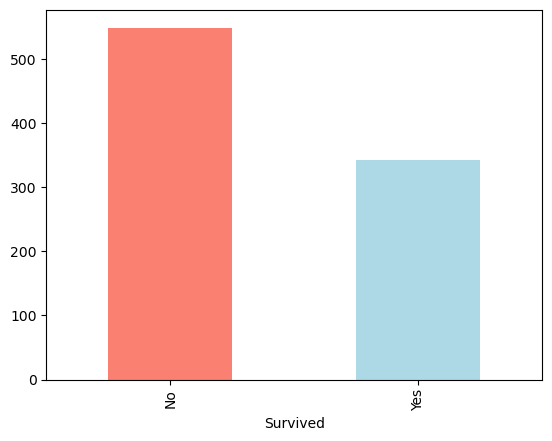

In [5]:
# Plot the survived Column
df['Survived'].value_counts().rename(index = {0: 'No', 1:'Yes'}).plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.show()

In [6]:
# check the data info
df.info()
# looking at this I might want to delete Name Ticket Cabin and Emarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# are they any missing values
df.isna().sum()
# I'd fill the age with the mediana

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# see some statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survivers according to Sex

Remember that what I'm doing here is:

1. Comapre different columns with each other
2. Start Gaining some intuiton about how the features relate to the target **Survived**
3. Compare independent variables with the dependent variable (Target: Suvived)
4. How to they relate to the target?

In [9]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

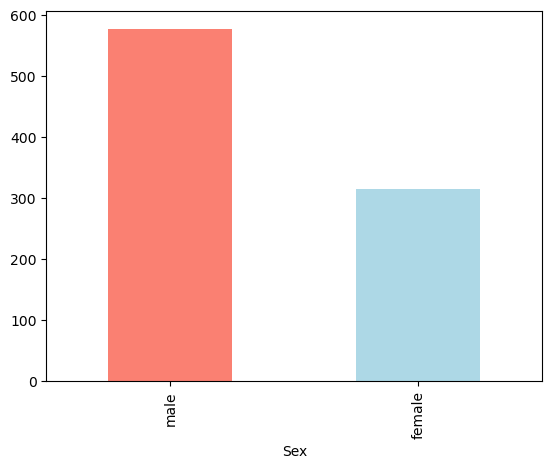

In [10]:
df['Sex'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.show()

In [11]:
# how to compare sex to the target column
# use crosstab
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


I can intute something from here. For a women is more likely to be a surviver

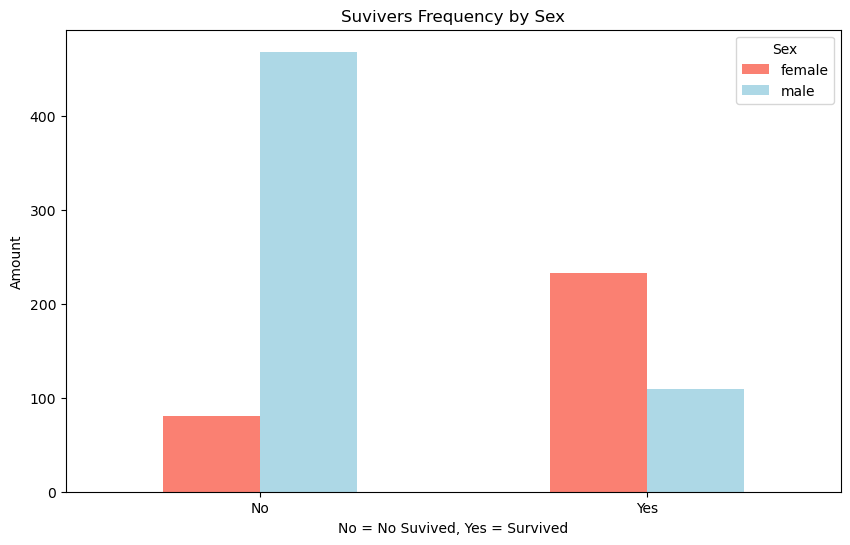

In [12]:
pd.crosstab(df.Survived, df.Sex).rename(index = {0: 'No', 1: 'Yes'}).plot(kind = 'bar',
                                                                         figsize = (10, 6),
                                                                         color = ['salmon', 'lightblue'])
plt.title('Suvivers Frequency by Sex')
plt.xlabel('No = No Suvived, Yes = Survived')
plt.ylabel('Amount')
plt.xticks(rotation = 0)
plt.show()

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Age vs Fare for Survived

In [14]:
mapeo_sexo = {'female': 0, 'male': 1}
df['Sex'] = df['Sex'].map(mapeo_sexo)
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [15]:
df.Sex[df.Survived == 1]

1      0
2      0
3      0
8      0
9      0
      ..
875    0
879    0
880    0
887    0
889    1
Name: Sex, Length: 342, dtype: int64

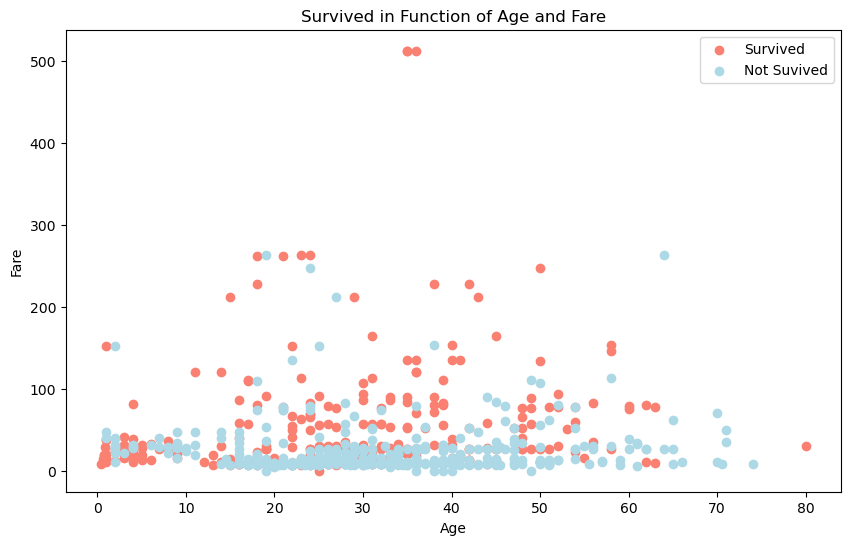

In [16]:
# create a figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.Age[df.Survived  == 1],
            df.Fare[df.Survived == 1],
            c = 'salmon')

# Scatter with negative examples
plt.scatter(df.Age[df.Survived == 0],
           df.Fare[df.Survived == 0],
           c = 'lightblue')

# Add some helpful info
plt.title('Survived in Function of Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(['Survived', 'Not Suvived'])
plt.show()

You can see that if your fare was higher it is more likely to be a surviver. defenitly consider this feature

## Embarked

In [17]:
df['Embarked'].value_counts()
# There are a lot of persons from S

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
pd.crosstab(df.Survived, df.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


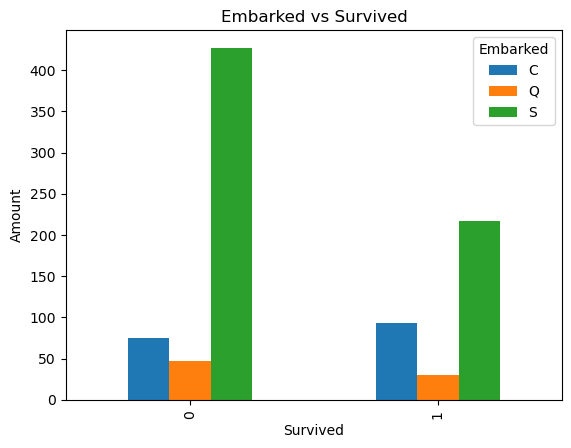

In [19]:
pd.crosstab(df.Survived, df.Embarked).plot(kind = 'bar')
plt.title('Embarked vs Survived')
plt.ylabel('Amount')
plt.show()

There is not sucha bigger relation with the Embarked

## Age vs Survived

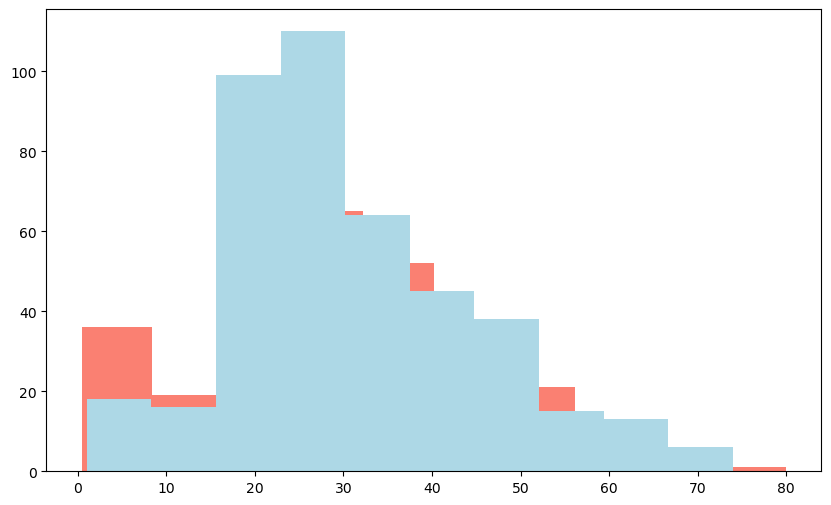

In [20]:
# create another figure
plt.figure(figsize = (10, 6))

# Hist the survivers
plt.hist(df.Age[df.Survived == 1],
        color = 'salmon')

# Hist the no survivers
plt.hist(df.Age[df.Survived == 0],
        color = 'lightblue')

plt.show()

## Survived Frquency vs Pclass

In [21]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


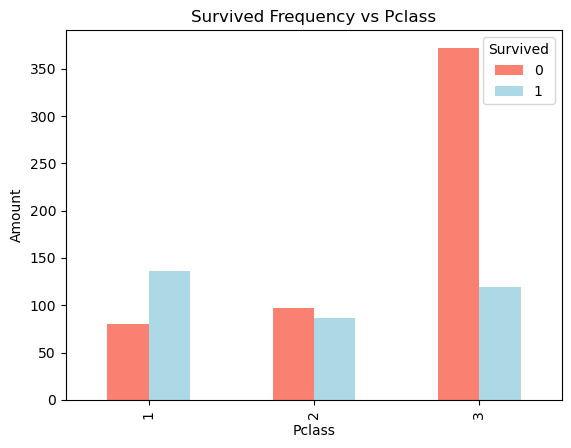

In [22]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = 'bar',
                                        color = ['salmon', 'lightblue'])

plt.title('Survived Frequency vs Pclass')
plt.ylabel('Amount')

plt.show()

We can not say that because of the class you can suvived or not because there are equal results. On 3 class died more, because there where more people on that class

Now we're going to build a correlation matrix wich tell us how each independet variables interact with each other. I am going to drop cabin ticket embarked name

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_2 = df.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [25]:
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [26]:
df_2.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


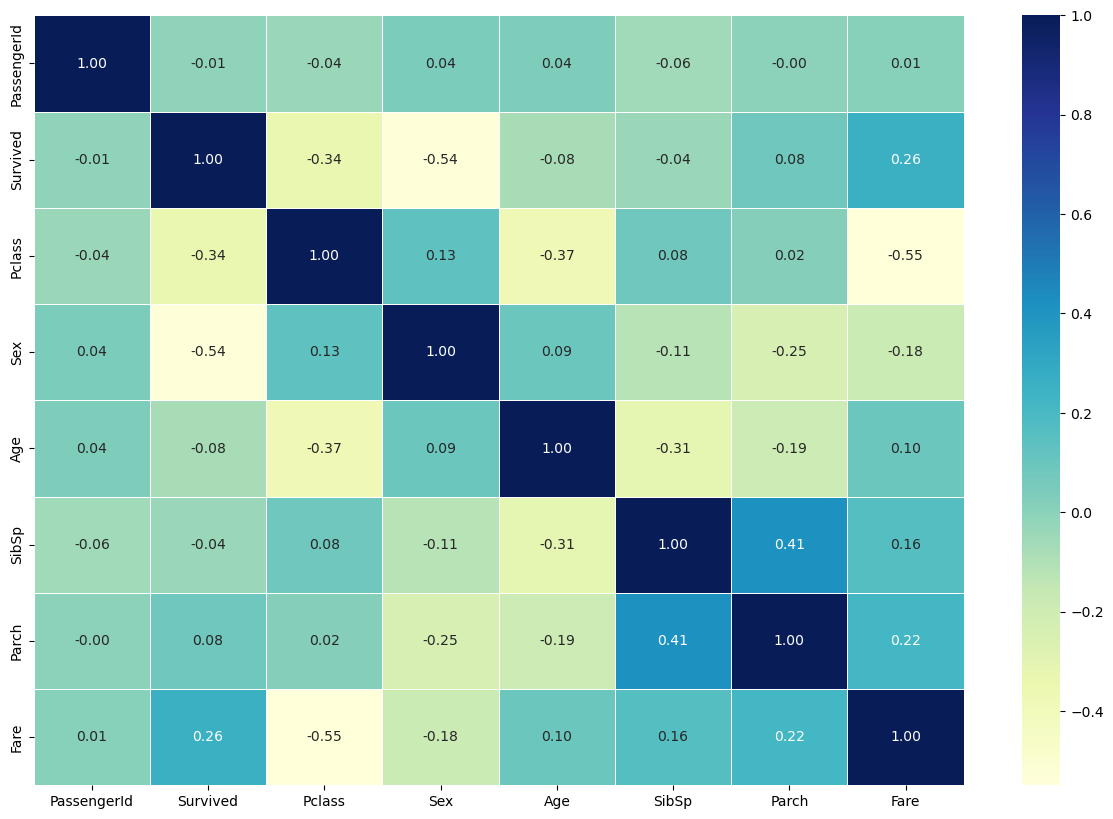

In [27]:
# let's make our correlation matrix a little prettier
corr_matrix = df_2.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')
plt.show()

We could keep doing this but what we want to do next is a model driven. Build a ML model to drive inside on how the independent variables contributes to the target variable.

## 5. Modeling

In [28]:
# See the data
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [29]:
# split data into X and Y
X = df_2.drop('Survived', axis = 1)
y = df_2['Survived']

In [30]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
# split data into train and test sets
np.random.seed(42)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 7), (712,), (179, 7), (179,))

In [34]:
# Check for Nan values
X_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            140
SibSp            0
Parch            0
Fare             0
dtype: int64

In [35]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

In [36]:
X_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            37
SibSp           0
Parch           0
Fare            0
dtype: int64

In [37]:
# Fill NaN values
X_train['Age'] = X_train['Age'].fillna(int(X_train['Age'].median()))
X_test['Age'] = X_test['Age'].fillna(int(X_train['Age'].median()))

In [38]:
# check the NaN values
X_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [39]:
X_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

We are going to try 3 different ML models:

1. Logistic Regression
2. K-Nearest Neghbours Classifier
3. Random Forest Classifier
4. XGBClassifier

In [40]:
# put the models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier(),
         'XGBClassifier': xgb.XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models : a dict of different Scikit-Learn and XGBoost ML models.
    X_train : Training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test_labels
    """
    # Set Random Seed
    np.random.seed(42)

    # make a dictionary to keep model score
    model_scores = {}

    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
# let's see how each of this models has performed
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.776536312849162,
 'KNN': 0.659217877094972,
 'Random Forest': 0.8044692737430168,
 'XGBClassifier': 0.7653631284916201}

### Model Comparison

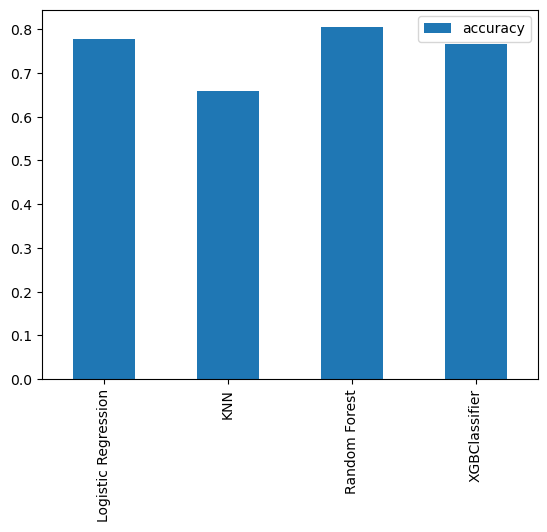

In [42]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot(kind = 'bar')
plt.show()

In [43]:
model_compare

,Logistic Regression,KNN,Random Forest,XGBClassifier
accuracy,0.776536,0.659218,0.804469,0.765363


Now we have got a baseline model and we know that our first model predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance

The nexts are specifics for classification problem:

* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classificationreport
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [44]:
# let's tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN isntance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [45]:
train_scores

[1.0,
 0.8061797752808989,
 0.8033707865168539,
 0.7485955056179775,
 0.7471910112359551,
 0.7191011235955056,
 0.7191011235955056,
 0.7008426966292135,
 0.6980337078651685,
 0.6966292134831461,
 0.6924157303370787,
 0.6825842696629213,
 0.6924157303370787,
 0.6910112359550562,
 0.6924157303370787,
 0.6853932584269663,
 0.6811797752808989,
 0.6741573033707865,
 0.675561797752809,
 0.672752808988764]

In [46]:
test_scores

[0.6089385474860335,
 0.6312849162011173,
 0.5865921787709497,
 0.6424581005586593,
 0.659217877094972,
 0.659217877094972,
 0.659217877094972,
 0.6480446927374302,
 0.6536312849162011,
 0.6424581005586593,
 0.6368715083798883,
 0.6368715083798883,
 0.6480446927374302,
 0.6480446927374302,
 0.6480446927374302,
 0.659217877094972,
 0.659217877094972,
 0.659217877094972,
 0.6871508379888268,
 0.6759776536312849]

Maximun KNN score on the test data: 68.72


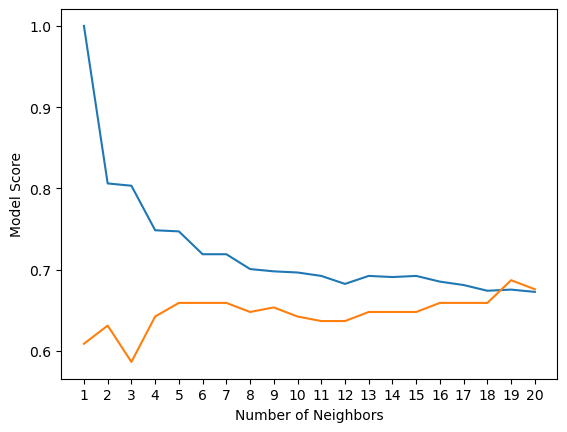

In [47]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')

print(f'Maximun KNN score on the test data: {max(test_scores) * 100:.2f}')
plt.show()

It has increased it's score from 0.65 to 0.68
I'm going to drop KNN since is the baddest

## Hyperparameter tunning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
* XGBClassifier()

In [48]:
import scipy.stats as stats
# create a Hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# create hyperparameter grid for RandomClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

# create hyperparameter grid for XGBoost
xgb_grid = {'n_estimators': stats.randint(50, 200),
           'max_depth': stats.randint(3, 10),
           'learning_rate': stats.uniform(0.01, 0.1),
           'subsample': stats.uniform(0.5, 0.5)}

In [49]:
# tune XGBClassifier
np.random.seed(42)

# set up random hyperparameter search for LogisticRegression
rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(),
                           param_distributions = xgb_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# fit random hyperparameter search model for logisticregression
rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E9FF7AE900>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E98170C7D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E9FF7AD550>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E98170F390>},
                   verbose=True)

In [50]:
rs_xgb.best_params_

{'learning_rate': np.float64(0.06632882178455393),
 'max_depth': 4,
 'n_estimators': 58,
 'subsample': np.float64(0.5079831261101071)}

In [51]:
rs_xgb.score(X_test, y_test)

0.7988826815642458

In [52]:
# tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [54]:
rs_log_reg.score(X_test, y_test)

0.7932960893854749

In [55]:
# set up random seed
np.random.seed(42)

# set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [57]:
rs_rf.score(X_test, y_test)

0.7932960893854749

In [58]:
model_scores

{'Logistic Regression': 0.776536312849162,
 'KNN': 0.659217877094972,
 'Random Forest': 0.8044692737430168,
 'XGBClassifier': 0.7653631284916201}

We're going to keep up with Random Forest since has the best results

## Hyperparameter Tuning with GridSearchCV

Since our Random Forest model provides the best scores, we will try and improve them again using GridSearchCV

In [90]:
# Different hyperparameters for our RandoForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

# set up grid hyperparameter search for RF
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid = rf_grid,
                    cv = 5,
                    verbose = True)

# fit grid hyperparameter search model
gs_rf.fit(X_train, y_train)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'n_iter'

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(X_test, y_test)

In [ ]:
mode_scores

## Evaluating our tuned ML classifier, beyonnd Accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation used where possible

In [61]:
# fit the RandomForest model

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.8044692737430168

In [62]:
# make predictions with tuned model
# write the model you are going to use
model = rf_model

In [63]:
# make the predictions
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [64]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

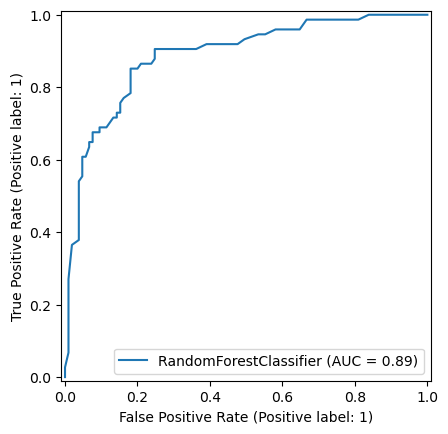

In [65]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [66]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[91 14]
 [21 53]]


In [78]:
# use seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

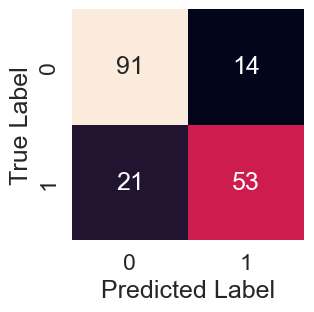

In [79]:
plot_conf_mat(y_test, y_preds)

let's get a classification report

In [80]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-validation

In [83]:
# check best hyperparameters
# try to use the results from randomizedsearch and gridsearchcv
# mine took too much time on GSCV, I cancel it
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [84]:
# create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators = 310,
                            min_samples_split = 12,
                            min_samples_leaf = 5,
                            max_depth = None)

In [85]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [86]:
# cross validates accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')
cv_acc

array([0.79888268, 0.82022472, 0.84269663, 0.80898876, 0.83707865])

In [87]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8215742891218379)

In [88]:
# cross validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = 'precision')
cv_precision

array([0.94117647, 0.8       , 0.80327869, 0.88888889, 0.88461538])

In [89]:
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8635918865234198)

In [90]:
# cross_val recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv = 5,
                           scoring = 'recall')
cv_recall

array([0.47826087, 0.70588235, 0.70588235, 0.60294118, 0.66666667])

In [91]:
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.631926683716965)

In [92]:
# cross_val f1
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv = 5,
                       scoring = 'f1')
cv_f1

array([0.62745098, 0.75      , 0.75968992, 0.7008547 , 0.76033058])

In [93]:
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.719665236447975)

In [95]:
metrics = {'accuracy': cv_acc,
          'precision': cv_precision,
          'recall': cv_recall,
          'f1': cv_f1}

In [97]:
cv_metrics = pd.DataFrame(metrics, index = [0])
cv_metrics

,accuracy,precision,recall,f1
0,0.821574,0.863592,0.631927,0.719665


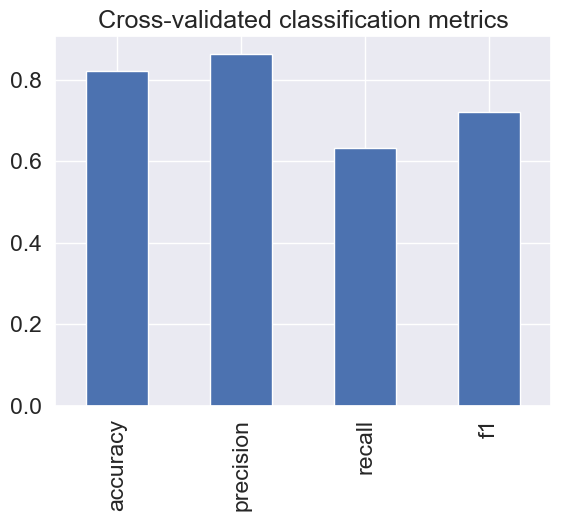

In [99]:
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics',
                     legend = False)
plt.show()

### Feature importance

Feature importance is another asking, 'wich features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for (MODEL NAME) feature importance.

Let's find the feature importance for our LogisticRegression model...

In [100]:
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [102]:
# fit and instance of RandomForestClassifeir

clf = RandomForestClassifier(n_estimators = 310,
                            min_samples_split = 12,
                            min_samples_leaf = 5,
                            max_depth = None)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=12,
                       n_estimators=310)

In [104]:
clf.feature_importances_

array([0.10645481, 0.11905501, 0.40022732, 0.11568382, 0.03715295,
       0.02858193, 0.19284415])

In [105]:
feature_dict = dict(zip(X.columns, list(clf.feature_importances_)))
feature_dict

{'PassengerId': np.float64(0.10645481424079513),
 'Pclass': np.float64(0.11905501277893121),
 'Sex': np.float64(0.40022731871433026),
 'Age': np.float64(0.11568382067922726),
 'SibSp': np.float64(0.037152950157227936),
 'Parch': np.float64(0.028581932288851426),
 'Fare': np.float64(0.19284415114063674)}

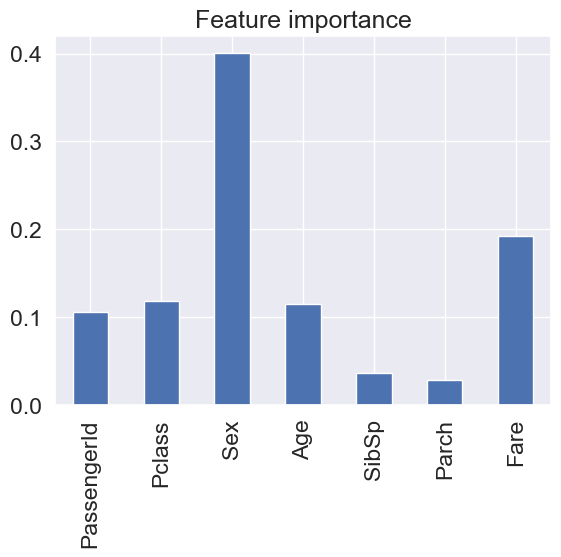

In [107]:
feature_df = pd.DataFrame(feature_dict, index = [0])

feature_df.T.plot.bar(title = 'Feature importance', legend = False)
plt.show()

## Make predictions with the unseen data

In [109]:
z = pd.read_csv('data/test.csv')
z.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
X.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.25


In [111]:
z = z.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
z.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [113]:
mapeo_sexo = {'female': 0, 'male': 1}
z['Sex'] = z['Sex'].map(mapeo_sexo)
z.Sex

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [121]:
z_preds = model.predict(z)
z_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
z.shape

(418, 7)

In [130]:
preds_df = pd.DataFrame({'PassengerId': z['PassengerId'],
                        'Survived': z_preds})
preds_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [131]:
survived.value_counts()

PassengerId  Survived
1309         0           1
892          0           1
1293         0           1
1292         1           1
1291         0           1
                        ..
898          1           1
897          0           1
896          0           1
895          0           1
894          0           1
Name: count, Length: 418, dtype: int64

In [132]:
preds_df.to_csv('data/preds.csv' , index = False)